In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [14]:
list_mol_tags('JPL')

 TAG        NAME     NLINE  QLOG1  QLOG2  QLOG3  QLOG4  QLOG5   QLOG6  QLOG7  VER
------ ------------- ------ ------ ------ ------ ------ ------ ------- ------ ---
  1001        H-atom      1 0.6021 0.6021 0.6021 0.6021 0.6021  0.6021 0.6021   1
  2001        D-atom      1 0.7782 0.7782 0.7782 0.7782 0.7782  0.7782 0.7782   1
  3001            HD      1 0.7004 0.5864 0.4315 0.1962 0.0406  0.0014 0.0001   2
  4001          H2D+     32 1.8834 1.6986 1.4401 0.9882 0.4919  0.0846 0.0016  2*
  7001        Li-6-H     51 1.4493 1.3248 1.1515 0.8603 0.5803  0.3226 0.1138  2*
  8001           LiH     53 1.4581 1.3336 1.1602 0.8688 0.5883  0.3297 0.1188  2*
  8002        Li-6-D     80 1.6901 1.5631 1.3878 1.0921 0.8029  0.5263 0.2755   1
  9001           LiD     90  1.706 1.5788 1.4034 1.1075 0.8173  0.5403 0.2876   1
 12001        C-atom      2 0.8939 0.8744 0.8363 0.7295 0.5494  0.3075 0.0962   2
 13001     C-13-atom      7  1.195 1.1754 1.1374 1.0305 0.8504  0.6085 0.3972   2
 13002          

TAG,NAME,NLINE,QLOG1,QLOG2,QLOG3,QLOG4,QLOG5,QLOG6,QLOG7,VER
int64,str13,int64,float64,float64,float64,float64,float64,float64,float64,str2
1001,H-atom,1,0.6021,0.6021,0.6021,0.6021,0.6021,0.6021,0.6021,1
2001,D-atom,1,0.7782,0.7782,0.7782,0.7782,0.7782,0.7782,0.7782,1
3001,HD,1,0.7004,0.5864,0.4315,0.1962,0.0406,0.0014,0.0001,2
4001,H2D+,32,1.8834,1.6986,1.4401,0.9882,0.4919,0.0846,0.0016,2*
7001,Li-6-H,51,1.4493,1.3248,1.1515,0.8603,0.5803,0.3226,0.1138,2*
8001,LiH,53,1.4581,1.3336,1.1602,0.8688,0.5883,0.3297,0.1188,2*
8002,Li-6-D,80,1.6901,1.5631,1.3878,1.0921,0.8029,0.5263,0.2755,1
9001,LiD,90,1.706,1.5788,1.4034,1.1075,0.8173,0.5403,0.2876,1
12001,C-atom,2,0.8939,0.8744,0.8363,0.7295,0.5494,0.3075,0.0962,2


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [6]:
# Get only the cubes that have our line of interest in them
mol_tag = 4501
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

    FREQ     ERR   LGINT   DR   ELO    GUP MOLWT TAG QNFMT  Ju  Ku  vu F1u F2u F3u  Jl  Kl  vl F1l F2l F3l name  Lab 
    MHz      MHz  MHz nm2      1 / cm        u                                                                       
----------- ----- ------- --- -------- --- ----- --- ----- --- --- --- --- --- --- --- --- --- --- --- --- ---- -----
143285.9808 39.65 -6.4978   3 581.4862  11     4 501   303   5   0   5  --  --  --   4   2   2  --  --  -- H2D+ False
    FREQ    ERR   LGINT   DR   ELO    GUP MOLWT TAG QNFMT  Ju  Ku  vu F1u F2u F3u  Jl  Kl  vl F1l F2l F3l name  Lab 
    MHz     MHz  MHz nm2      1 / cm        u                                                                       
----------- ---- ------- --- -------- --- ----- --- ----- --- --- --- --- --- --- --- --- --- --- --- --- ---- -----
267881.1457 1.45 -2.9741   3 645.5669  27     4 501   303   4   3   1  --  --  --   4   3   2  --  --  -- H2D+ False
    FREQ     ERR   LGINT   DR    ELO    GUP MOLWT TAG QNFMT 

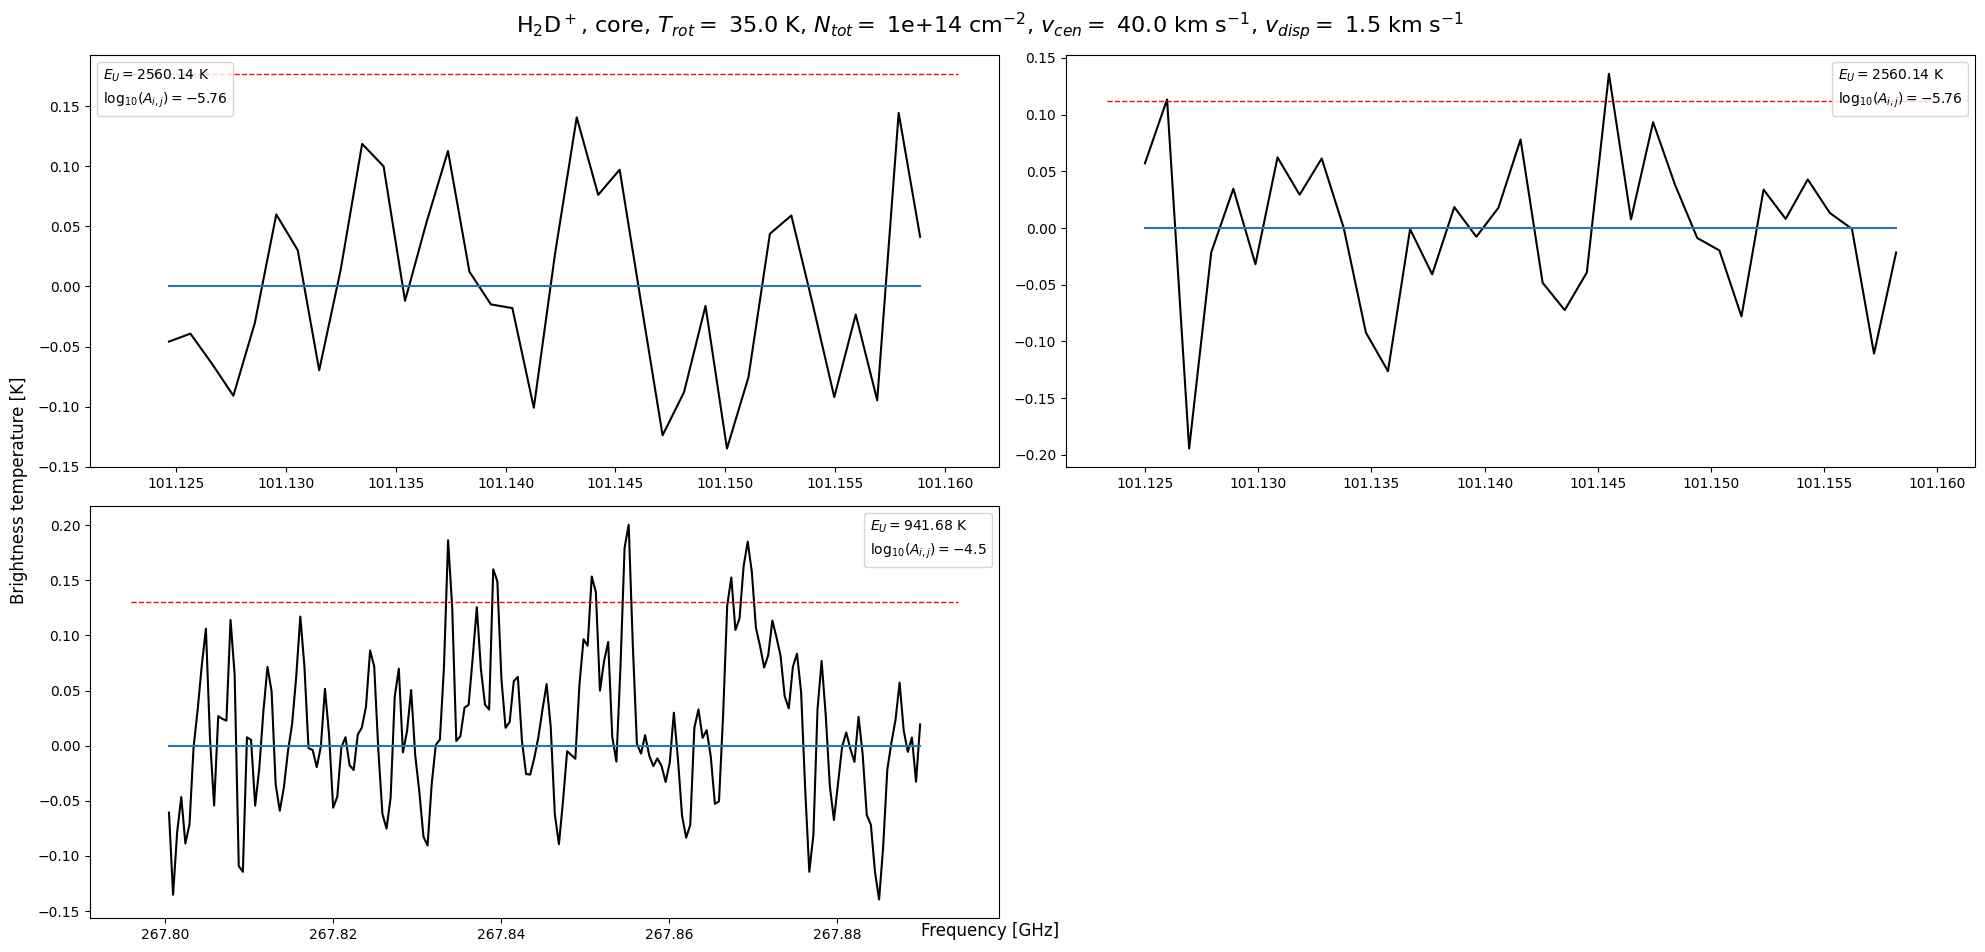

In [12]:
# Generate the model and plot the model and data spectra
freqs_mom0 = model_and_plot(cubes, temp = 35., N_tot = 1.0e+14, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
                            mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
                            nrows=2, ncols=2, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'H$_2$D$^+$',
                            extr_type="coord", crd=crd, return_freqs=True, EU_cutoff_K=3000, aij_cutoff=-6, show_2_sigma=True)

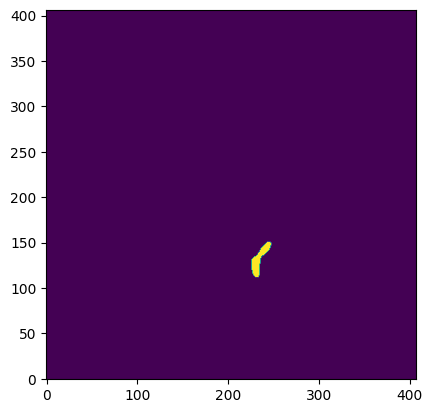

In [6]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

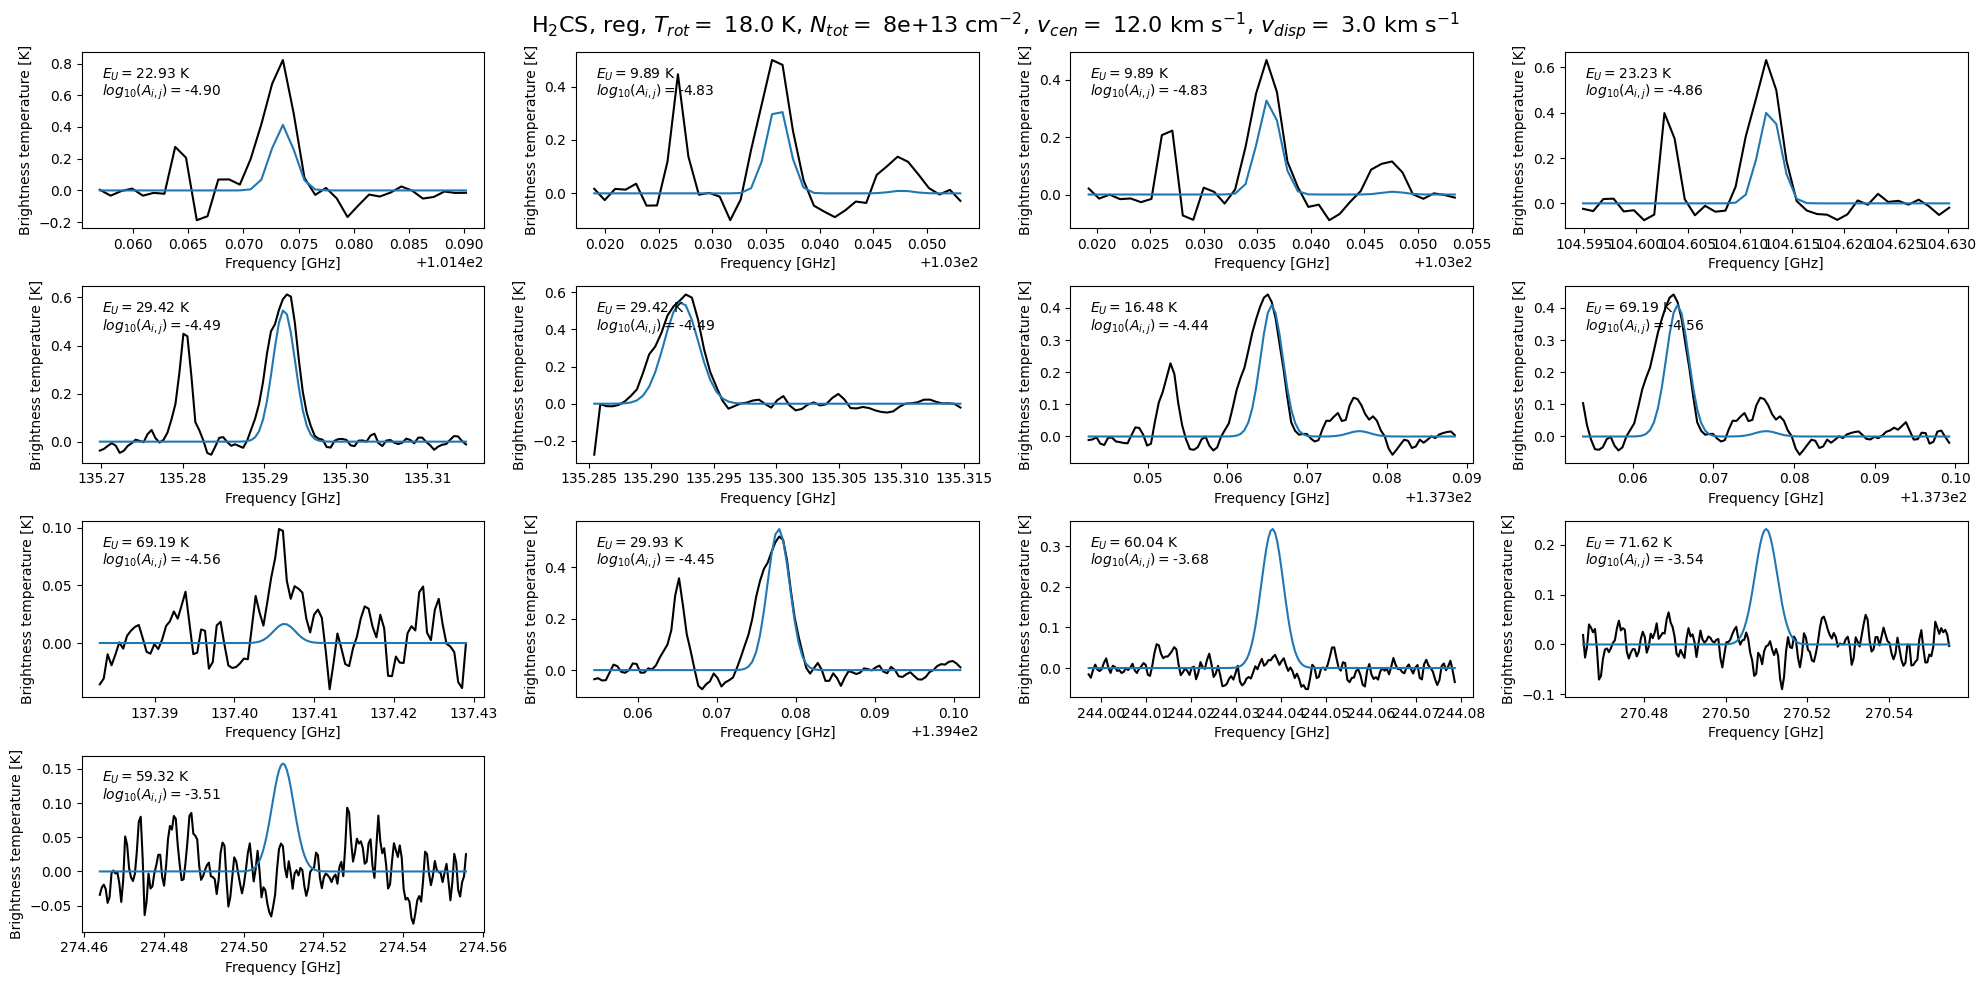

In [7]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes_masked, temp = 18., N_tot = 8.0e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=10, 
               nrows=4, ncols=4, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'H$_2$CS', extr_type="reg", just_data=False)

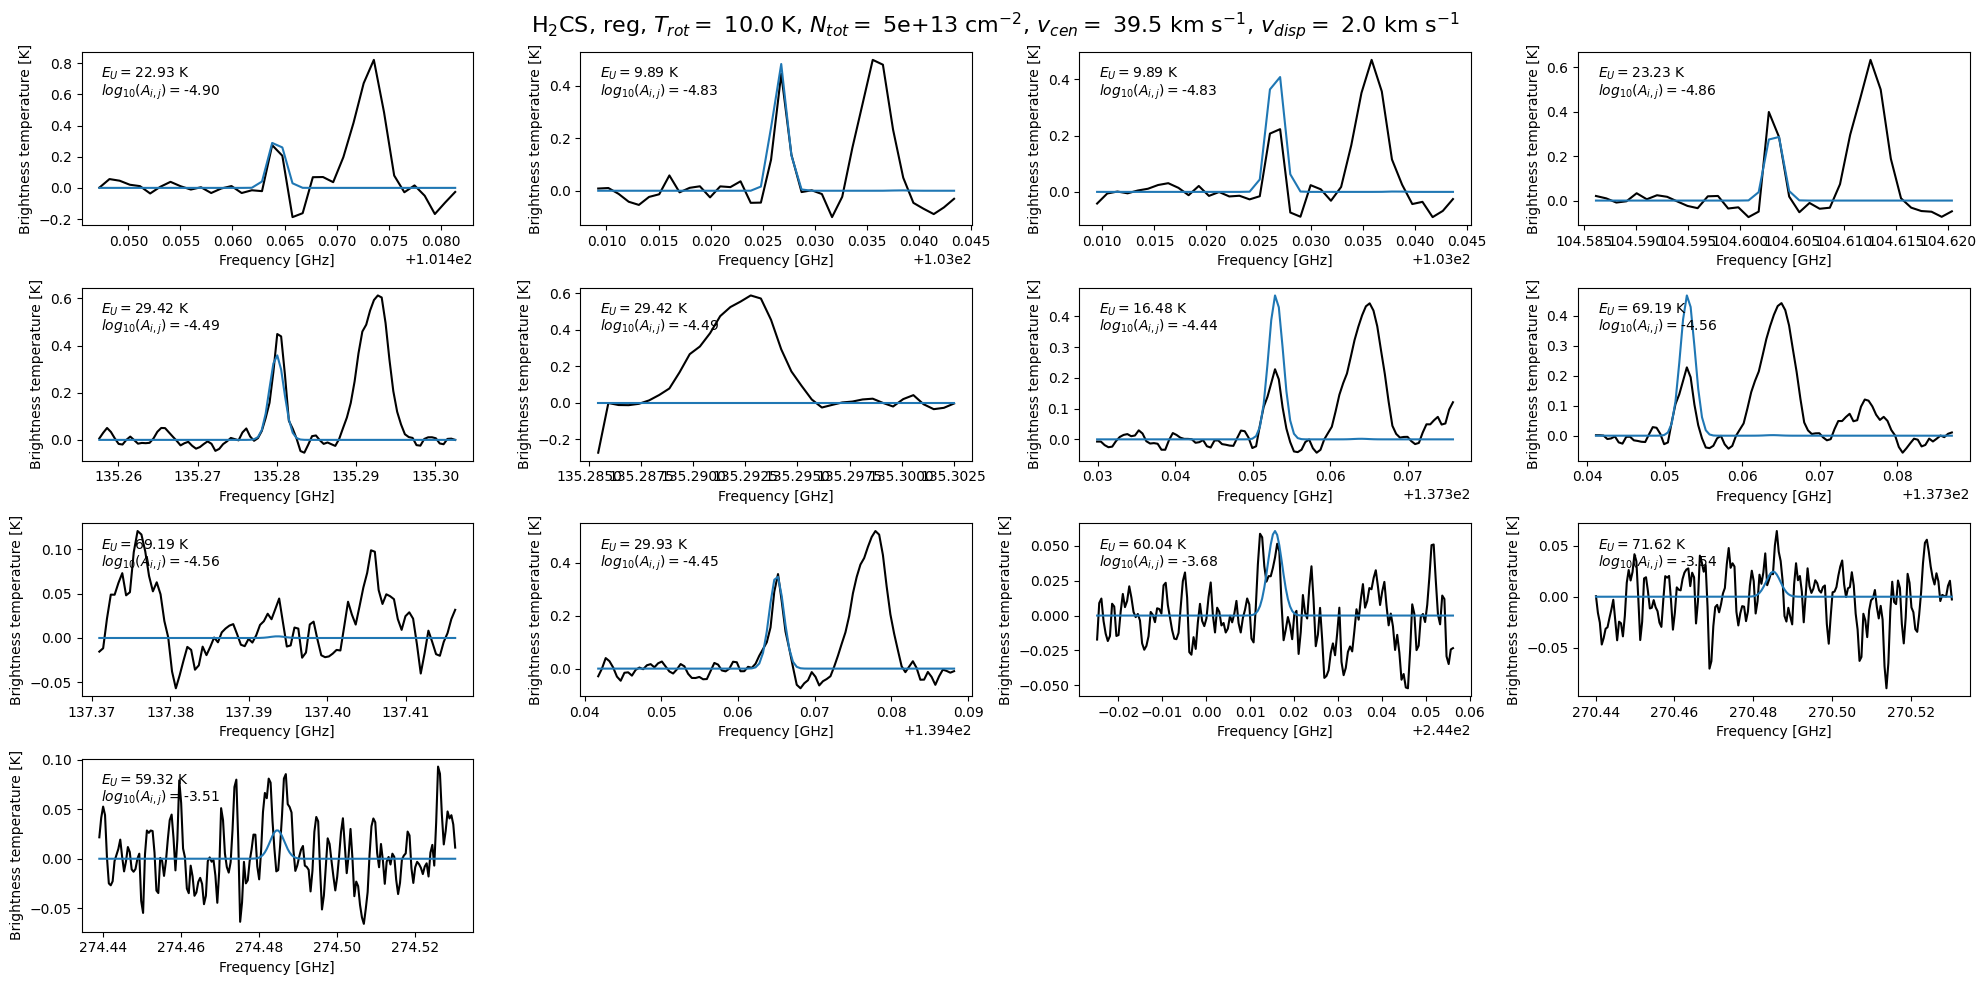

In [8]:
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 5.0e+13, v_cen = 39.5*u.km/u.s, v_disp = 2.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=10, 
                       nrows=4, ncols=4, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'H$_2$CS', extr_type="reg", just_data=False,
                       return_freqs=True)

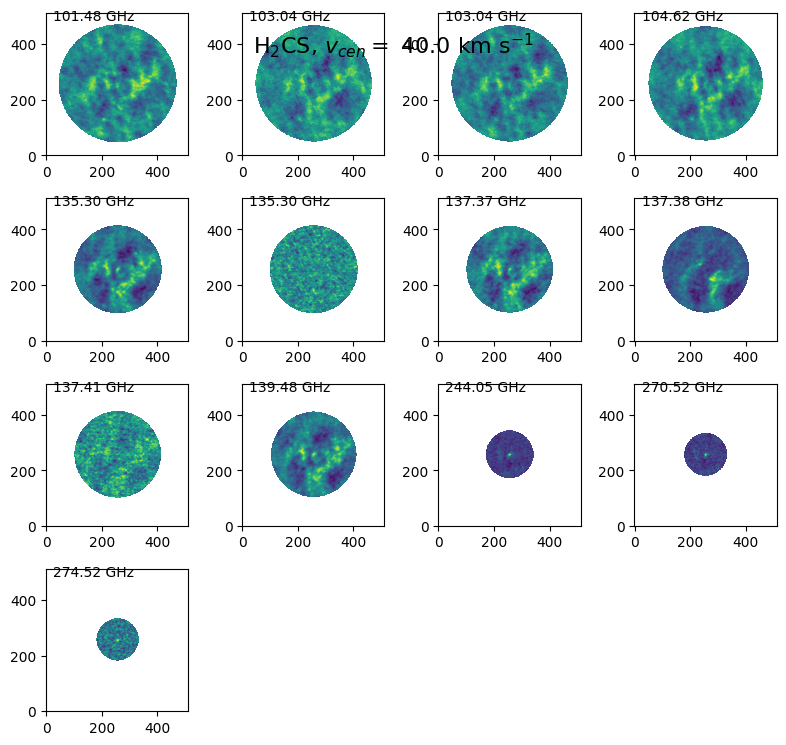

In [9]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=8, fig_height=8, nrows=4, ncols=4, name_for_plot=f'H$_2$CS')

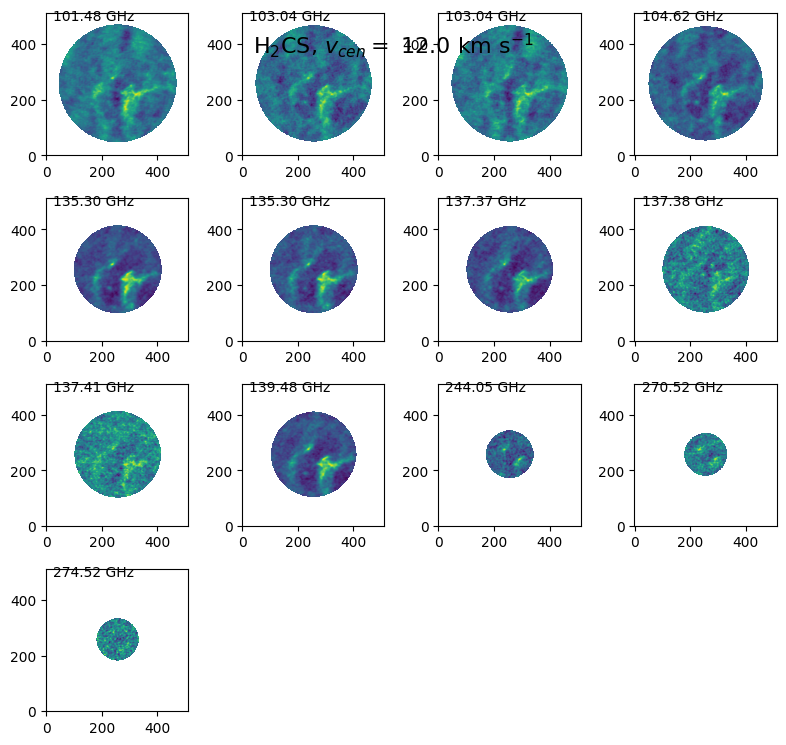

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=8, fig_height=8, nrows=4, ncols=4, name_for_plot=f'H$_2$CS')